In [133]:
from pathlib import Path

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

from sqb.tools import extract_character

In [134]:
tests = sorted(Path('tests').glob('*.png'))

In [139]:
def find_best_match(query_image, target_images_dir):
    best_match_filename = None
    best_match_score = 0

    sift = cv2.SIFT_create()
    keypoints_query, descriptors_query = sift.detectAndCompute(query_image, None)

    if descriptors_query is None:
        print("No keypoints/descriptors found in query image.")
        return None, 0

    for filename in sorted(Path('gt').glob('*.png')):
        target_image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

        keypoints_target, descriptors_target = sift.detectAndCompute(target_image, None)
        if descriptors_target is None:
            print(f"No keypoints/descriptors found in target image {filename}, skipping.")
            continue

        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)
        matches = flann.knnMatch(descriptors_query, descriptors_target, k=2)

        good_matches = []
        for m, n in matches:
            if m.distance < 0.7 * n.distance:
                good_matches.append(m)

        match_score = len(good_matches)

        if match_score > best_match_score:
            best_match_score = match_score
            best_match_filename = filename

    return best_match_filename, best_match_score

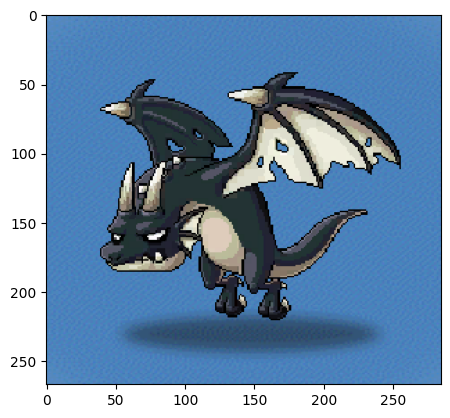

In [140]:
query = extract_character(tests[-2])
plt.imshow(query)

In [141]:
query = cv2.cvtColor(query[..., ::-1], cv2.COLOR_BGR2GRAY)

In [142]:
find_best_match(query, './gt')

(WindowsPath('gt/beach.png'), 3)

In [45]:
document_paths = sorted(Path('gt').glob('*.png'))

best_score = None
best_match_info = None

for doc_path in document_paths:
    document = cv2.imread(doc_path, 0)

    for scale in np.linspace(0.1, 1.0, 10):
        resized_template = cv2.resize(query, None, fx=scale, fy=scale)
        if resized_template.shape[0] > document.shape[0] or resized_template.shape[1] > document.shape[1]:
            continue

        res = cv2.matchTemplate(document, resized_template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        if (best_score is None) or (max_val > best_score):
            best_score = max_val
            best_match_info = {'doc': doc_path, 'location': max_loc, 'score': max_val}

print('Best match found in:', best_match_info['doc'])
print('Location:', best_match_info['location'])
print('Score:', best_match_info['score'])

AttributeError: 'NoneType' object has no attribute 'shape'

In [52]:
document = cv2.imread(image_path)
document_gray = cv2.cvtColor(document, cv2.COLOR_BGR2GRAY)

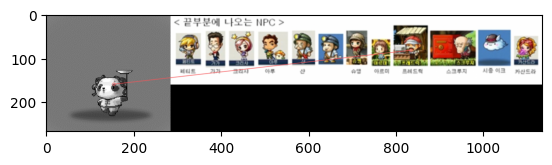

In [53]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(query_gray, None)
kp2, des2 = orb.detectAndCompute(document_gray, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

matched_img = cv2.drawMatches(query, kp1, document, kp2, matches[:1], None, flags=2)

plt.imshow(matched_img[..., ::-1])

In [59]:
matched_img.shape

(267, 1135, 3)

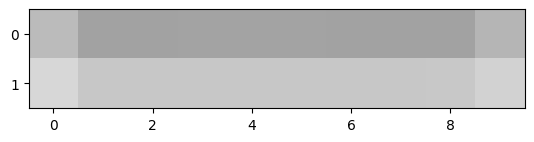

In [26]:
img = cv2.imread(image_path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)[1]

contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    character = image[y:y+h, x:x+w]
    plt.imshow(character[..., ::-1])

    break

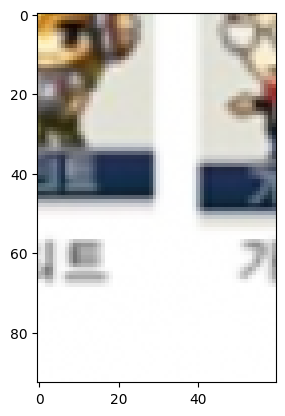

In [6]:
image_path = 'gt/NPC.png'
image = cv2.imread(image_path)

character_regions = [
    (40, 68, 60, 140),  # Character 1
    (110, 68, 60, 140),  # Character 2
    (180, 68, 60, 140),  # Character 3
    (250, 68, 60, 140),  # Character 4
    (320, 68, 60, 140),  # Character 5
    (390, 68, 60, 140),  # Character 6
    (460, 68, 60, 140),  # Character 7
    (530, 68, 60, 140),  # Character 8
    (600, 68, 60, 140),  # Character 9
    (670, 68, 60, 140),  # Character 10
    (740, 68, 60, 140),  # Character 11
    (810, 68, 60, 140),  # Character 12
    (880, 68, 60, 140),  # Character 13
    (950, 68, 60, 140),  # Character 14
    (40, 218, 60, 140),  # Character 15
    (110, 218, 60, 140),  # Character 16
    (180, 218, 60, 140),  # Character 17
    (250, 218, 60, 140),  # Character 18
    (320, 218, 60, 140),  # Character 19
    (390, 218, 60, 140),  # Character 20
    (460, 218, 60, 140),  # Character 21
    (530, 218, 60, 140),  # Character 22
    (600, 218, 60, 140),  # Character 23
    (670, 218, 60, 140),  # Character 24
    (740, 218, 60, 140),  # Character 25
    (810, 218, 60, 140),  # Character 26
    (40, 368, 60, 140),  # Character 27
    (110, 368, 60, 140),  # Character 28
    (180, 368, 60, 140),  # Character 29
    (250, 368, 60, 140),  # Character 30
    (320, 368, 60, 140),  # Character 31
    (390, 368, 60, 140),  # Character 32
    (460, 368, 60, 140),  # Character 33
    (530, 368, 60, 140),  # Character 34
    (600, 368, 60, 140),  # Character 35
    (670, 368, 60, 140),  # Character 36
    (740, 368, 60, 140),  # Character 37
    (810, 368, 60, 140),  # Character 38
    (40, 518, 60, 140),  # Character 39
    (110, 518, 60, 140),  # Character 40
    (180, 518, 60, 140),  # Character 41
    (250, 518, 60, 140),  # Character 42
    (320, 518, 60, 140),  # Character 43
    (390, 518, 60, 140),  # Character 44
    (460, 518, 60, 140),  # Character 45
    (530, 518, 60, 140),  # Character 46
    (600, 518, 60, 140),  # Character 47
    (670, 518, 60, 140)   # Character 48
]

# Iterate through the regions and crop the characters
for i, (x, y, w, h) in enumerate(character_regions):
    character = image[y:y+h, x:x+w]
    plt.imshow(character[..., ::-1])
    break